In [ ]:
from tshpo.automl_libs import *

metircs = AnaHelper.get_all_metrics()
df_baseline = AnaHelper.load_csv_file("c00_baseline_n500_madelon_original_20241029_1434.csv.gz")
df_baseline['ftype'] = "baseline"
df_tsselect = AnaHelper.load_csv_file("c09_select_optimal_alg_v4_original_20241101_1059.csv.gz")
df_tsselect['ftype'] = "tshpo"

m_df = pd.concat([df_baseline, df_tsselect])
m_df['model_training_time_min'] = m_df['model_training_time'] / 60
m_df

,Unnamed: 0,id,default_max,default_min,status,#instances,model_training_time,data_processing_time,walk_time,configs_and_metrics,...,n_samples_for_each_model,hpo_opt_method,max_samples,n_exploration,data_sample_method,data_sample_rate,hpc,parsed_configs_and_metrics,ftype,model_training_time_min
0,0,c427013a92d8ce49f8a1a1cbc8453045,0.7151,0.2348,success,7000,1370.1949,0.0020,102.57,[(Configuration(values={\n '__choice__': 'ada...,...,NaN,RS,NaN,500,RS,1.0,NaN,config_index model default elapsed...,baseline,22.836582
1,0,7214331fb8a91d6464543b320533cb2c,0.7094,0.2414,success,7000,1266.5857,0.0023,104.17,[(Configuration(values={\n '__choice__': 'ada...,...,NaN,RS,NaN,500,RS,1.0,NaN,config_index model default elapsed...,baseline,21.109762
2,0,dcfc2d8287c46e7f16ca88976fc2f27f,0.6962,0.2857,success,7000,1333.7785,0.0039,103.76,[(Configuration(values={\n '__choice__': 'ada...,...,NaN,RS,NaN,500,RS,1.0,NaN,config_index model default elapsed...,baseline,22.229642
3,0,3dadf237221e7f082219af482de376a0,0.7332,0.2545,success,7000,1273.0891,0.0051,100.57,[(Configuration(values={\n '__choice__': 'ada...,...,NaN,RS,NaN,500,RS,1.0,NaN,config_index model default elapsed...,baseline,21.218152
4,0,74ad5f642e1a1c86f5c04281258fcba6,0.7430,0.2742,success,7000,1326.9102,0.0027,101.55,[(Configuration(values={\n '__choice__': 'ada...,...,NaN,RS,NaN,500,RS,1.0,NaN,config_index model default elapsed...,baseline,22.115170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,0,8a5c6a05a1a789c549f17867aa861796,0.7620,0.1201,success,1400,999.1596,0.8184,1002.30,[(Configuration(values={\n '__choice__': 'ada...,...,NaN,RS,NaN,100,RS,0.3,NaN,config_index model default elapsed...,tshpo,16.652660
136,0,2bdd2d7d8873779959045c334303c3d7,0.6835,0.1184,success,1400,887.1759,0.5128,888.63,[(Configuration(values={\n '__choice__': 'ada...,...,NaN,RS,NaN,100,RS,0.3,NaN,config_index model default elapsed...,tshpo,14.786265
137,0,9ef4f26f6437c67adf2230b14482032d,0.7273,0.1244,success,1400,933.6176,0.5508,936.14,[(Configuration(values={\n '__choice__': 'ada...,...,NaN,RS,NaN,100,RS,0.3,NaN,config_index model default elapsed...,tshpo,15.560293
138,0,0eb1729cd8affc9898b2cd3c89b5ffb5,0.6028,0.1159,success,1400,917.5247,0.5116,919.46,[(Configuration(values={\n '__choice__': 'ada...,...,NaN,RS,NaN,100,RS,0.3,NaN,config_index model default elapsed...,tshpo,15.292078


In [3]:
len(df_baseline['dataset'].drop_duplicates().tolist())

28

In [4]:
m_df.groupby(by=['ftype'])['model_training_time_min'].agg(['mean', 'std'])


,mean,std
ftype,,
baseline,400.254246,763.655570
tshpo,8.818885,3.670088


In [5]:
m_df = AnaHelper.append_data_size_type(m_df)
m_df

,Unnamed: 0,id,default_max,default_min,status,#instances,model_training_time,data_processing_time,walk_time,configs_and_metrics,...,hpo_opt_method,max_samples,n_exploration,data_sample_method,data_sample_rate,hpc,parsed_configs_and_metrics,ftype,model_training_time_min,data_size_type
0,0,c427013a92d8ce49f8a1a1cbc8453045,0.7151,0.2348,success,7000,1370.1949,0.0020,102.57,[(Configuration(values={\n '__choice__': 'ada...,...,RS,NaN,500,RS,1.0,NaN,config_index model default elapsed...,baseline,22.836582,small
1,0,7214331fb8a91d6464543b320533cb2c,0.7094,0.2414,success,7000,1266.5857,0.0023,104.17,[(Configuration(values={\n '__choice__': 'ada...,...,RS,NaN,500,RS,1.0,NaN,config_index model default elapsed...,baseline,21.109762,small
2,0,dcfc2d8287c46e7f16ca88976fc2f27f,0.6962,0.2857,success,7000,1333.7785,0.0039,103.76,[(Configuration(values={\n '__choice__': 'ada...,...,RS,NaN,500,RS,1.0,NaN,config_index model default elapsed...,baseline,22.229642,small
3,0,3dadf237221e7f082219af482de376a0,0.7332,0.2545,success,7000,1273.0891,0.0051,100.57,[(Configuration(values={\n '__choice__': 'ada...,...,RS,NaN,500,RS,1.0,NaN,config_index model default elapsed...,baseline,21.218152,small
4,0,74ad5f642e1a1c86f5c04281258fcba6,0.7430,0.2742,success,7000,1326.9102,0.0027,101.55,[(Configuration(values={\n '__choice__': 'ada...,...,RS,NaN,500,RS,1.0,NaN,config_index model default elapsed...,baseline,22.115170,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,0,8a5c6a05a1a789c549f17867aa861796,0.7620,0.1201,success,1400,999.1596,0.8184,1002.30,[(Configuration(values={\n '__choice__': 'ada...,...,RS,NaN,100,RS,0.3,NaN,config_index model default elapsed...,tshpo,16.652660,large
136,0,2bdd2d7d8873779959045c334303c3d7,0.6835,0.1184,success,1400,887.1759,0.5128,888.63,[(Configuration(values={\n '__choice__': 'ada...,...,RS,NaN,100,RS,0.3,NaN,config_index model default elapsed...,tshpo,14.786265,large
137,0,9ef4f26f6437c67adf2230b14482032d,0.7273,0.1244,success,1400,933.6176,0.5508,936.14,[(Configuration(values={\n '__choice__': 'ada...,...,RS,NaN,100,RS,0.3,NaN,config_index model default elapsed...,tshpo,15.560293,large
138,0,0eb1729cd8affc9898b2cd3c89b5ffb5,0.6028,0.1159,success,1400,917.5247,0.5116,919.46,[(Configuration(values={\n '__choice__': 'ada...,...,RS,NaN,100,RS,0.3,NaN,config_index model default elapsed...,tshpo,15.292078,large


In [6]:
# ID202410211634219324044

_time_df1 = m_df.groupby(by=['ftype', 'data_size_type'])['model_training_time_min'].agg(['mean', 'std']).astype(int)
# _time_df1.to_latex("time_compare.tex")
# _time_df1
_time_df1 = _time_df1.reset_index()
_time_df1

,ftype,data_size_type,mean,std
0,baseline,large,1247,821
1,baseline,middle,386,816
2,baseline,small,29,6
3,tshpo,large,14,2
4,tshpo,middle,8,2
5,tshpo,small,6,1


In [7]:
# table 1
# ID202411271552448743815
_stat_res = pd.pivot_table(_time_df1, index=['data_size_type'], columns=['ftype'], values=['mean', 'std'])
_stat_res['Control Group'] = _stat_res.apply(
    lambda x: str(x[('mean', 'baseline')]) + "(±" + str(x[('std', 'baseline')]) + ")", axis=1)
_stat_res['Experimental Group'] = _stat_res.apply(
    lambda x: str(x[('mean', 'tshpo')]) + "(±" + str(x[('std', 'tshpo')]) + ")", axis=1)
_stat_res = _stat_res.reset_index()
_final_static = _stat_res[['data_size_type', 'Control Group', 'Experimental Group']]
FileHelper().to_latex(_final_static, "tab1_time_compare.tex")
_final_static

,data_size_type,Control Group,Experimental Group
ftype,,,
0,large,1247(±821),14(±2)
1,middle,386(±816),8(±2)
2,small,29(±6),6(±1)


In [8]:
# 在33个数据集上
from tshpo.automl_libs import *

metircs = AnaHelper.get_all_metrics()
df = m_df
datasets = sorted(df['dataset'].drop_duplicates().tolist())
feature_selec_method = df['feature_selec_method'].drop_duplicates().tolist()
feature_selec_rate = df['feature_selec_rate'].drop_duplicates().tolist()

date_sample_rate = df['data_sample_rate'].drop_duplicates().tolist()
# n_exploration = df['n_exploration'].drop_duplicates().tolist()

outputs = []
_arr = list(itertools.product(
    datasets,
    metircs,
    # n_exploration
))

for _index, (_dataset, _metric) in tqdm(enumerate(_arr), total=len(_arr)):
    _baseline_df = df_baseline[df_baseline['dataset'] == _dataset]
    _test_df = df_tsselect[df_tsselect['dataset'] == _dataset]
    top_models_tshpo, acc_tshpo = AnaHelper.find_top_models_tshpo(_test_df, metric=_metric, alpha=None)
    top_models_baseline, acc_baseline = AnaHelper.find_top_models_tshpo(_baseline_df, metric=_metric, alpha=None)
    tshpo = pd.DataFrame({
        "model_name": top_models_tshpo,
        "acc": acc_tshpo,
        "metric": _metric,
        "dataset": _dataset
    })
    baseline = pd.DataFrame({
        "model_name": top_models_baseline,
        "acc": acc_baseline,
    })
    mer_df = baseline.merge(tshpo, how="left", on="model_name", suffixes=('_baseline', "_tshpo"))
    outputs.append(mer_df)


100%|██████████| 168/168 [02:20<00:00,  1.19it/s]


In [9]:
ana_df = pd.concat(outputs)
ana_df = AnaHelper.normal_model_name(ana_df)
ana_df.to_pickle("ana_df.pkl")
ana_df

,model_name,acc_baseline,acc_tshpo,metric,dataset
0,RF,0.89866,0.83388,roc_auc,Bioresponse
1,ET,0.88928,0.83990,roc_auc,Bioresponse
2,Ada,0.87584,0.81124,roc_auc,Bioresponse
3,SGD,0.86020,0.80062,roc_auc,Bioresponse
4,MLP,0.85974,0.82104,roc_auc,Bioresponse
...,...,...,...,...,...
9,QDA,0.73078,0.01538,recall,wilt
10,SVC,0.58462,0.42308,recall,wilt
11,GNB,0.52308,0.01538,recall,wilt
12,LDA,0.12308,0.10000,recall,wilt


In [10]:
ana_df['model_name'].drop_duplicates().tolist()

['RF',
 'ET',
 'Ada',
 'SGD',
 'MLP',
 'LDA',
 'DT',
 'QDA',
 'SVC',
 'KNN',
 'SVM',
 'BNB',
 'GNB',
 'MNB']

In [11]:
plot_df = pd.melt(ana_df, id_vars=['model_name', 'dataset', 'metric'], value_vars=['acc_baseline', 'acc_tshpo'])
plot_df

,model_name,dataset,metric,variable,value
0,RF,Bioresponse,roc_auc,acc_baseline,0.89866
1,ET,Bioresponse,roc_auc,acc_baseline,0.88928
2,Ada,Bioresponse,roc_auc,acc_baseline,0.87584
3,SGD,Bioresponse,roc_auc,acc_baseline,0.86020
4,MLP,Bioresponse,roc_auc,acc_baseline,0.85974
...,...,...,...,...,...
4699,QDA,wilt,recall,acc_tshpo,0.01538
4700,SVC,wilt,recall,acc_tshpo,0.42308
4701,GNB,wilt,recall,acc_tshpo,0.01538
4702,LDA,wilt,recall,acc_tshpo,0.10000


Saved to /Users/sunwu/SW-Research/AutoML-Benchmark/tshpo/runtime/exp_outputs/ob_roc_auc.pdf
Saved to /Users/sunwu/SW-Research/AutoML-Benchmark/tshpo/runtime/exp_outputs/ob_accuracy.pdf
Saved to /Users/sunwu/SW-Research/AutoML-Benchmark/tshpo/runtime/exp_outputs/ob_f1.pdf


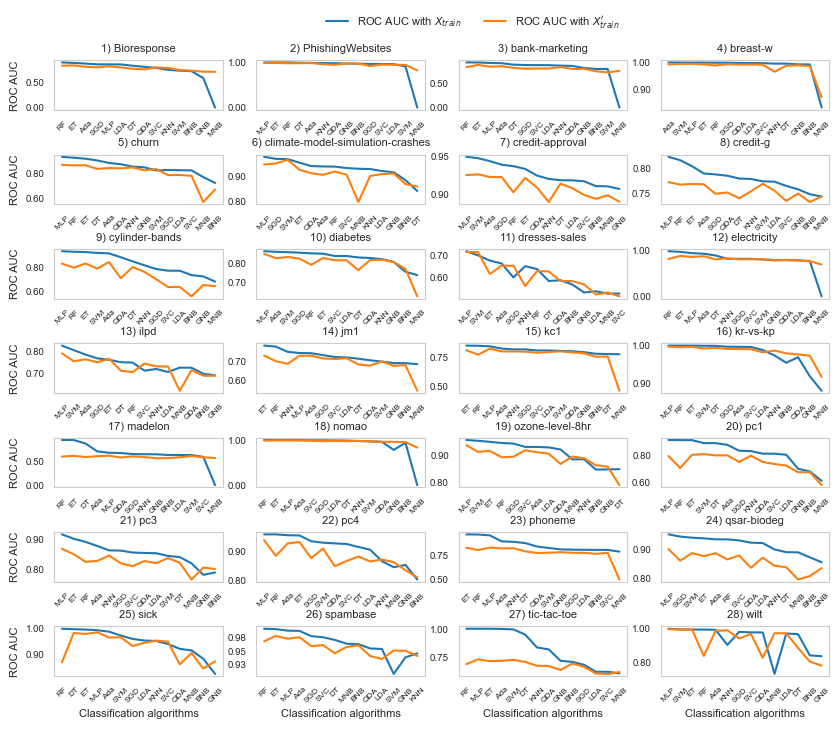

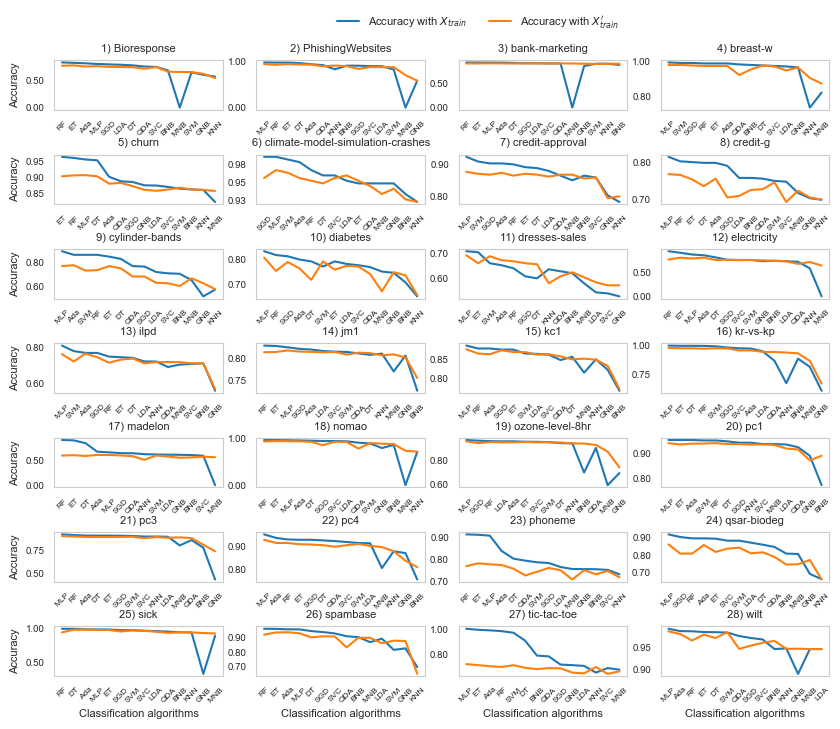

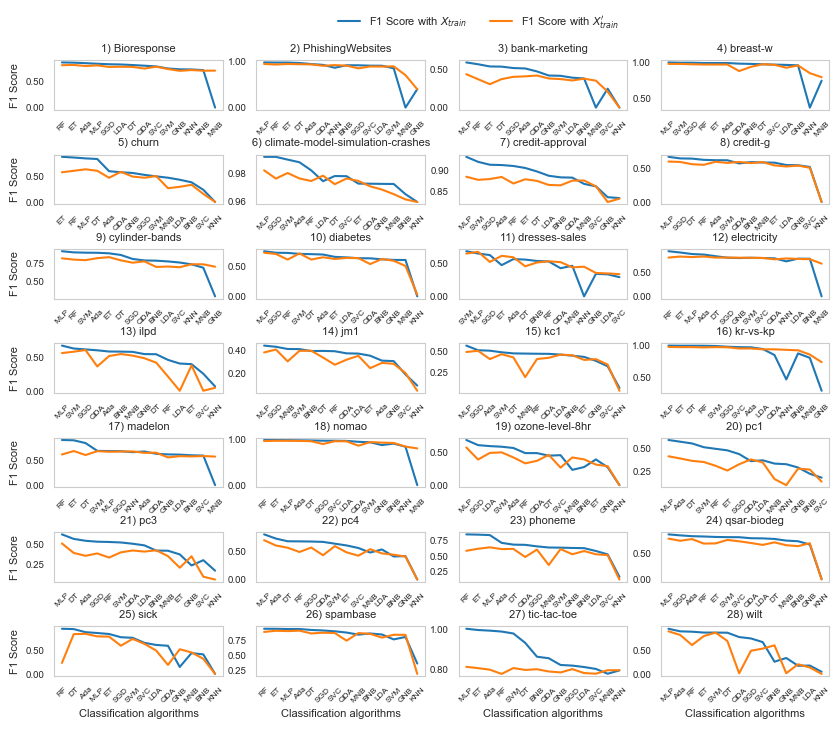

In [12]:
# fig1: ID2024112715521792778894
from matplotlib import pyplot as plt
import seaborn as sns

# remove_dataset = ['pc1', 'dresses-sales', 'cylinder-bands', 'kc1']
remove_dataset = []

for metric in ["roc_auc", "accuracy", "f1"]:
    fig = plt.figure(figsize=(10, 8))
    labels = [AnaHelper.normal_metric_name(metric) + r" with $X_{train}$",
              AnaHelper.normal_metric_name(metric) + " with $X_{train}^\prime$"]
    _index = 0
    for _d in datasets:
        _df = plot_df[(plot_df['dataset'] == _d) & (plot_df['metric'] == metric)]
        _df = _df.sort_values(by=['value', 'model_name'], ascending=False)
        ax = fig.add_subplot(7, 4, _index + 1)
        ax.tick_params(axis='x', which='major', labelsize=7, labelrotation=45)
        ax.tick_params(axis='y', which='major', labelsize=7, labelrotation=0)
        ax.set_title(f"{_index + 1}) {_d}", fontsize=8)
        # ax.set_ylim(0.5,1)
        sns.lineplot(_df, x="model_name", y="value", hue="variable", ax=ax)
        ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
        if _index < 24:
            ax.set_xlabel(None)
        else:
            ax.set_xlabel("Classification algorithms", fontsize=8)
            # ax.set_xlabel(None)
            pass
        ax.grid(False)

        if _index in [0, 4, 8, 12, 16, 20, 24]:
            ax.set_ylabel(AnaHelper.normal_metric_name(metric), fontsize=8)
        else:
            ax.set_ylabel(None)
        ax.legend_.remove()
        # 设置 x 轴刻度字体大小
        ax.tick_params(axis='x', labelsize=6)  # 这里的14是字体大小
        _index = _index + 1

        # print(ax.xaxis.get_tick_params(which='major'))
        # sns.lineplot(_df,x="model_name",y="acc_baseline",hue="metric",ax=ax,label="baseline")
    fig.subplots_adjust(hspace=0.9)
    h, l = ax.get_legend_handles_labels()
    fig.legend(h, labels, bbox_to_anchor=(0.7, 0.95), ncol=2, fontsize=8, frameon=False)
    # fig.savefig(f"ob_{metric}.pdf", bbox_inches='tight', dpi=300)
    FileHelper().to_pdf(fig, f"ob_{metric}.pdf")
